## Name: Batyrkhan Taldybayev
## Group: IT3-2203
## Date: 05.04.2025
---
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("student.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

---
## Data visualisation:
## • Exam_Score distribution
## • Correlation heatmap for numeric features

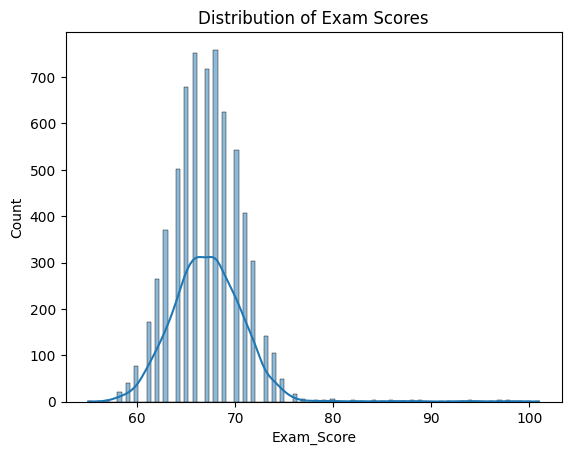

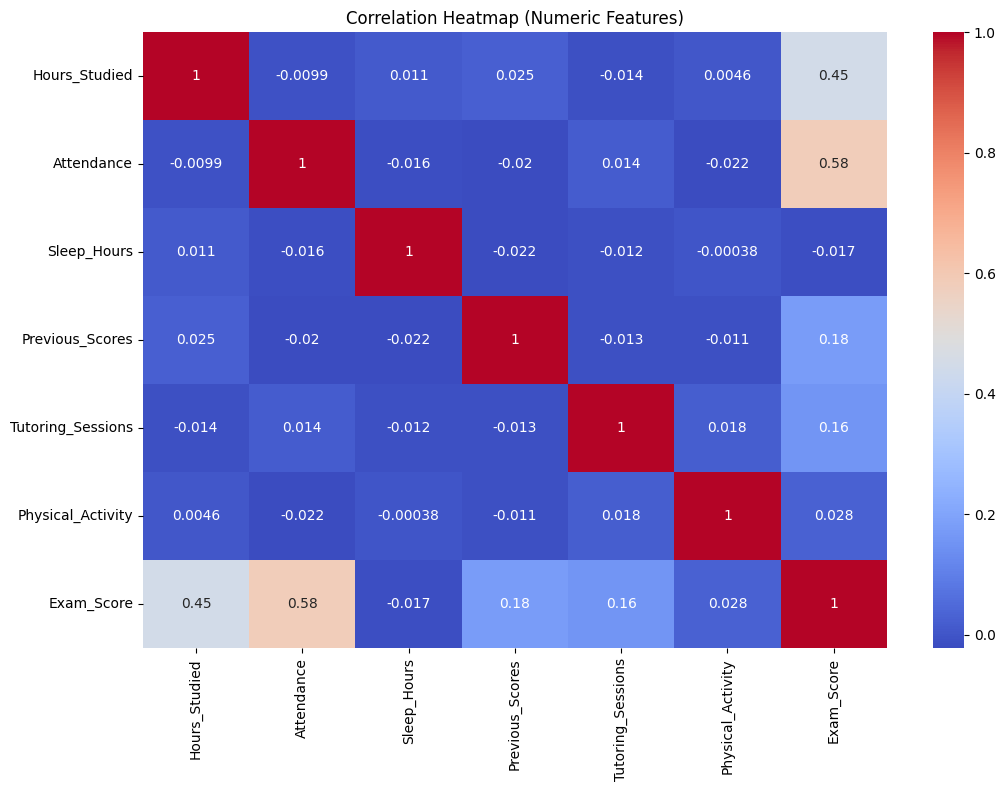

In [5]:
sns.histplot(data['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

---
## Data preprocessing
### First, I need to encode categorical columns

In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Learning_Disabilities", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

le = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)

In [7]:
X = data.drop(['Exam_Score'], axis=1)
y = data['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0.504942,0.348375,-0.254249,-1.380517,-1.214685,-0.019796,-0.143800,-0.393061,0.285825,-1.213934,-0.284883,0.742375,0.661006,1.070550,0.031411,-0.342867,0.103120,0.717316,0.855746
1,-0.162822,-1.383736,-0.254249,0.913804,-1.214685,0.661399,-1.116110,-0.393061,0.285825,0.411451,1.062448,0.742375,0.661006,-1.575587,1.001199,-0.342867,-1.248688,-0.742280,-1.168570
2,0.671882,1.560853,0.901062,0.913804,0.823259,-0.019796,1.106313,0.884966,0.285825,0.411451,1.062448,0.742375,0.661006,-0.252518,1.001199,-0.342867,1.454927,0.717316,0.855746
3,1.506587,0.781403,-0.254249,0.913804,0.823259,0.661399,1.592469,0.884966,0.285825,-0.401242,1.062448,0.742375,0.661006,-1.575587,1.001199,-0.342867,0.103120,-0.742280,0.855746
4,-0.162822,1.041220,0.901062,0.913804,0.823259,-0.700990,-0.699406,0.884966,0.285825,1.224144,1.062448,-1.450726,0.661006,-0.252518,1.001199,-0.342867,-1.248688,0.717316,-1.168570


---
## Applying PCA

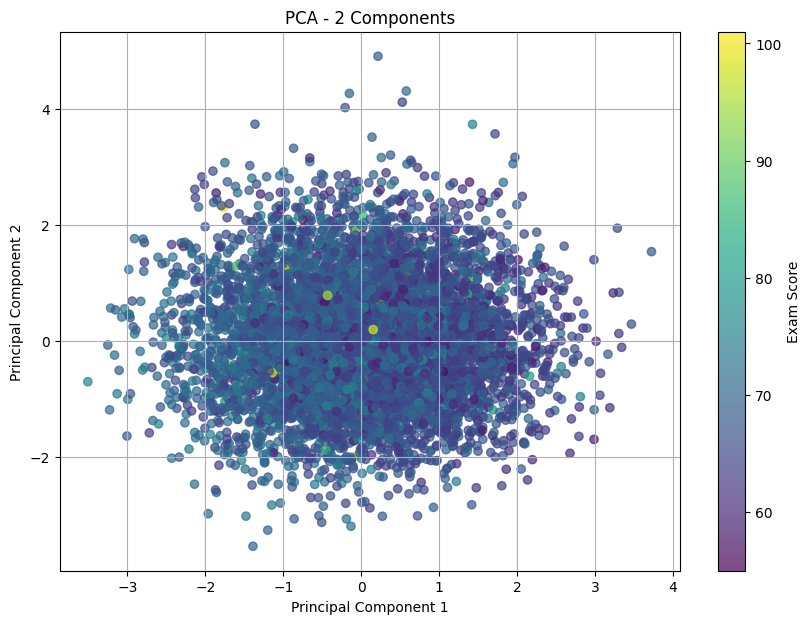

In [8]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Exam Score')
plt.title('PCA - 2 Components')
plt.grid(True)
plt.show()

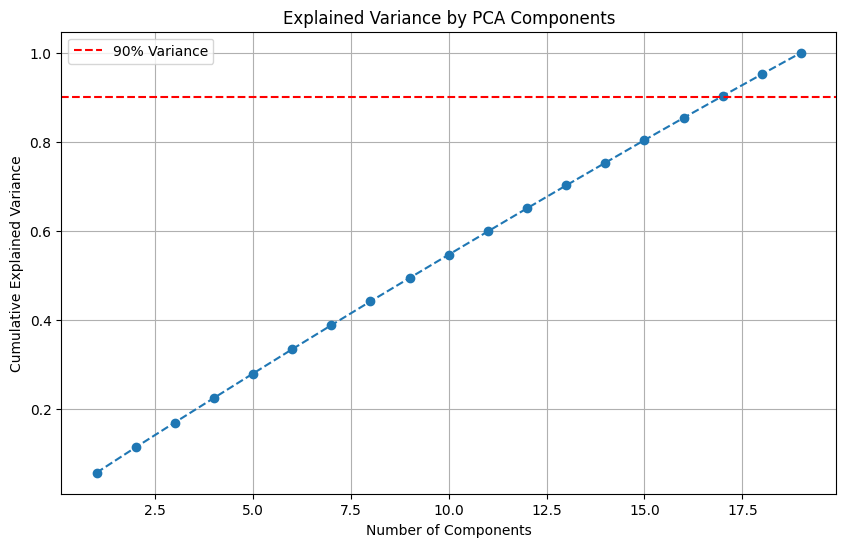

In [9]:
pca_all = PCA()
pca_all.fit(X_scaled)

explained_variance = pca_all.explained_variance_ratio_
cum_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_variance)+1), cum_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

In [10]:
pca_5 = PCA(n_components=5)
X_pca_5 = pca_5.fit_transform(X_scaled)

pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(5)],
    'Explained Variance': pca_5.explained_variance_ratio_
})


,Component,Explained Variance
0,PC1,0.057661
1,PC2,0.056931
2,PC3,0.055737
3,PC4,0.055071
4,PC5,0.054863


### In this table we see that PC1 = 5,76%, PC2 = 5,69% and so on. And sum of all components gives ~28% information which is low value actually. It means that data distributed evenly, but there are no obvious directions which means all features are important similarly
---

In [11]:
loadings = pd.DataFrame(pca_5.components_.T,
                        columns=[f'PC{i+1}' for i in range(5)],
                        index=X.columns)

loadings[['PC1', 'PC2']].sort_values(by='PC1', ascending=False).head(10)

,PC1,PC2
Physical_Activity,0.462041,0.175258
Family_Income,0.386102,-0.107838
Access_to_Resources,0.352642,0.204041
Learning_Disabilities,0.245603,0.042863
School_Type,0.226110,-0.050358
Previous_Scores,0.141277,-0.329602
Sleep_Hours,0.135881,-0.120041
Parental_Involvement,0.112260,-0.232933
Tutoring_Sessions,0.109882,0.408142
Extracurricular_Activities,0.102000,-0.101100


### The main contribution is given by Physical Activity (0.46). This means that this component is related to physical activity. So PC1 stands for some kind of socio-physical axis: income, resources, physical activity

### In PC2 the strongest contributions are Tutoring_Sessions (0.4) and Previous_Scores (-0.33). So PC2 stands for an axis that shows the influence of outside help (tutors), while the previous score has a negative effects, so perhaps those who studied poorly were more likely to take tutors
---

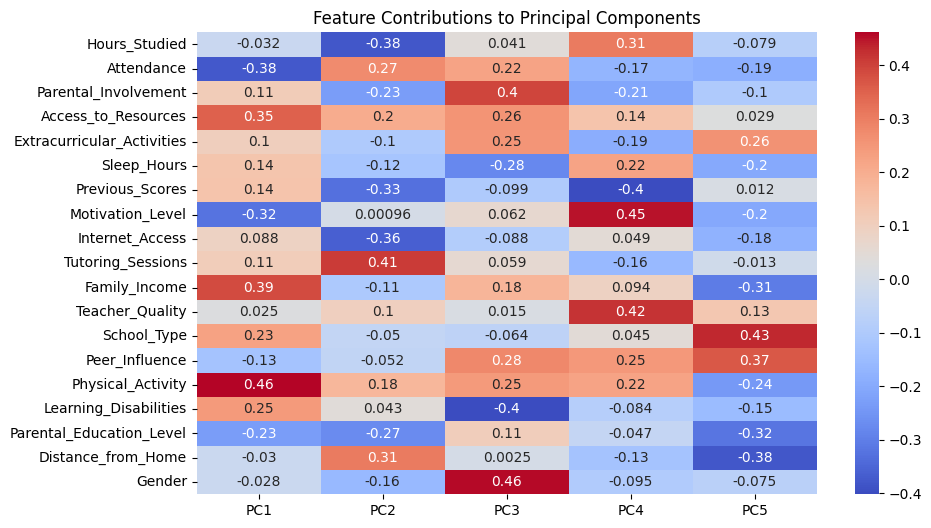

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True)
plt.title("Feature Contributions to Principal Components")
plt.show()